Setup: Installing necessary Python libraries and importing modules.

In [1]:
!pip install matplotlib numpy memory_profiler ipython

import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage
import time


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.2 MB/s eta 0:00:00


## Fibonacci Sequence Algorithms

### Naïve Recursive Fibonacci

- **Description:** Calculates the nth Fibonacci number using simple recursion.
- **Input:** Integer `n` (position in the Fibonacci sequence).
- **Output:** Fibonacci number at position `n`.
- **Time Complexity:** \(O(2^n)\) for best, average, and worst cases due to repeated calculations.
- **Space Complexity:** \(O(n)\) due to recursive call stack depth.
- **Suitability and Trade-offs:** Simple but inefficient for large `n`. High computational cost and risk of stack overflow for large inputs.

### Dynamic Programming Fibonacci (Memoization)

- **Description:** Optimizes Fibonacci calculation by storing intermediate results to avoid recomputation.
- **Input:** Integer `n`.
- **Output:** Fibonacci number at position `n`.
- **Time Complexity:** \(O(n)\) for all cases.
- **Space Complexity:** \(O(n)\) for memoization storage.
- **Suitability and Trade-offs:** Efficient and practical for large `n`. Requires additional memory for memo storage.


In [2]:
# Naïve Recursive Fibonacci
def fibonacci_recursive(n):
    if n <= 1:
        return n
    return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

# Dynamic Programming Fibonacci (memoization)
def fibonacci_dp(n, memo={}):
    if n in memo:
        return memo[n]
    if n <= 1:
        memo[n] = n
        return n
    memo[n] = fibonacci_dp(n-1, memo) + fibonacci_dp(n-2, memo)
    return memo[n]


In [3]:
from memory_profiler import memory_usage
import time

def profile_function(func, *args):
    # Measure memory usage during function execution
    mem_usage = memory_usage((func, args))
    # Measure execution time
    start_time = time.time()
    result = func(*args)
    end_time = time.time()
    exec_time = end_time - start_time
    return result, exec_time, max(mem_usage)

# Test input size
n = 20

# Profile naive recursive Fibonacci
result_rec, time_rec, mem_rec = profile_function(fibonacci_recursive, n)
print(f"Naive Recursive Fibonacci({n}): Result={result_rec}, Time={time_rec:.6f}s, Memory={mem_rec:.3f} MiB")

# Profile dynamic programming Fibonacci
result_dp, time_dp, mem_dp = profile_function(fibonacci_dp, n)
print(f"DP Fibonacci({n}): Result={result_dp}, Time={time_dp:.6f}s, Memory={mem_dp:.3f} MiB")


Naive Recursive Fibonacci(20): Result=6765, Time=0.002152s, Memory=106.359 MiB
DP Fibonacci(20): Result=6765, Time=0.000002s, Memory=106.359 MiB


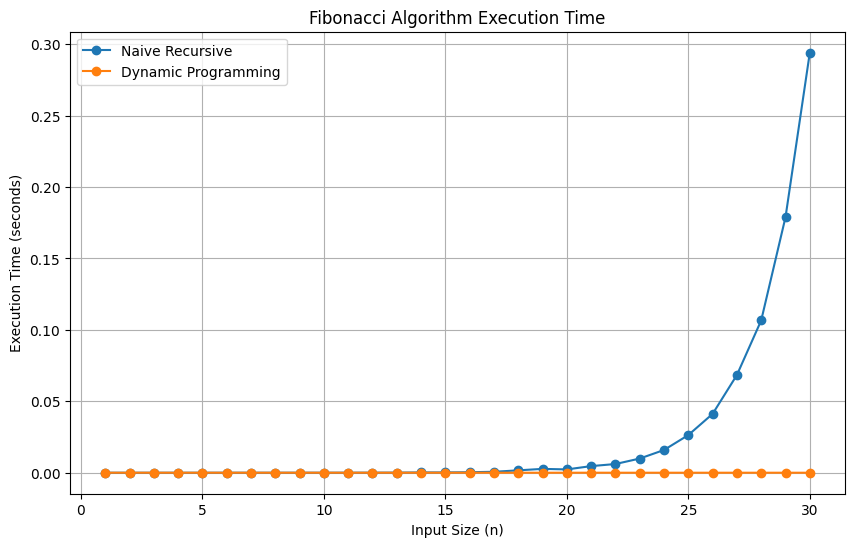

In [4]:
input_sizes = list(range(1, 31))  # Fibonacci input sizes from 1 to 30
times_rec = []
times_dp = []

for n in input_sizes:
    # Time naive recursive (limit to smaller inputs if too slow)
    if n <= 30:
        start = time.time()
        fibonacci_recursive(n)
        end = time.time()
        times_rec.append(end - start)
    else:
        times_rec.append(None)  # Skip large inputs for naive recursion

    # Time dynamic programming
    start = time.time()
    fibonacci_dp(n)
    end = time.time()
    times_dp.append(end - start)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(input_sizes, times_rec, label='Naive Recursive', marker='o')
plt.plot(input_sizes, times_dp, label='Dynamic Programming', marker='o')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Fibonacci Algorithm Execution Time')
plt.legend()
plt.grid(True)
plt.show()


Example

In [17]:
# Example usage of Fibonacci algorithms
n = 10
print("Fibonacci Recursive (n=10):", fibonacci_recursive(n))
print("Fibonacci DP (n=10):", fibonacci_dp(n))


Fibonacci Recursive (n=10): 55
Fibonacci DP (n=10): 55


## Merge Sort Algorithm

- **Description:** A divide-and-conquer sorting algorithm that recursively splits the list into halves, sorts them, and merges the sorted halves.
- **Input:** List or array of elements.
- **Output:** Sorted list.
- **Time Complexity:** Best, average, and worst case: \(O(n \log n)\).
- **Space Complexity:** \(O(n)\) due to additional arrays used in merging.
- **Suitability and Trade-offs:** Stable sort; good for large datasets. Requires extra memory for merging which can be a downside in memory-limited systems.


In [16]:
# Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

Example

In [18]:
arr = [64, 25, 12, 22, 11]
print("Original array:", arr)
print("Merge Sort:", merge_sort(arr))


Original array: [64, 25, 12, 22, 11]
Merge Sort: [11, 12, 22, 25, 64]


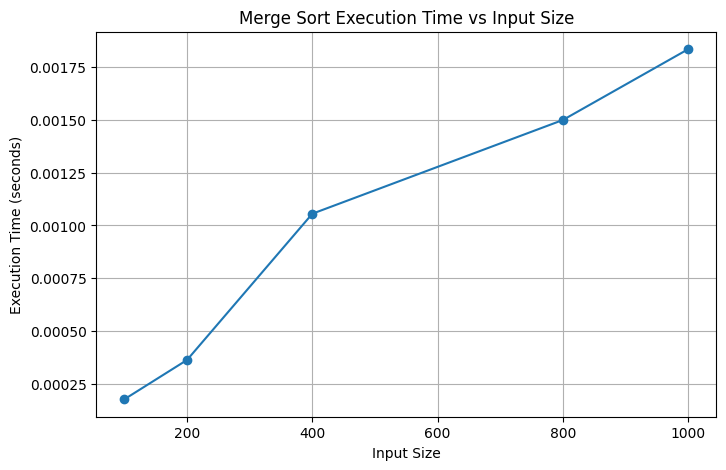

In [24]:
input_sizes = [100, 200, 400, 800, 1000]
times = []

for size in input_sizes:
    arr = random.sample(range(size * 10), size)
    start = time.time()
    merge_sort(arr)
    end = time.time()
    times.append(end - start)

plt.figure(figsize=(8,5))
plt.plot(input_sizes, times, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Merge Sort Execution Time vs Input Size')
plt.grid(True)
plt.show()


## Quick Sort Algorithm

- **Description:** A divide-and-conquer sorting algorithm that selects a pivot and partitions the list into elements less and greater than the pivot, then recursively sorts the partitions.
- **Input:** List or array of elements.
- **Output:** Sorted list.
- **Time Complexity:** Best and average case: \(O(n \log n)\); worst case: \(O(n^2)\) (when pivot selections are poor).
- **Space Complexity:** \(O(\log n)\) average call stack depth.
- **Suitability and Trade-offs:** Generally very fast; pivot choice can impact worst-case performance. Not stable.


In [12]:
# Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


Example

In [19]:
arr = [64, 25, 12, 22, 11]
print("Original array:", arr)
print("Quick Sort:", quick_sort(arr))


Original array: [64, 25, 12, 22, 11]
Quick Sort: [11, 12, 22, 25, 64]


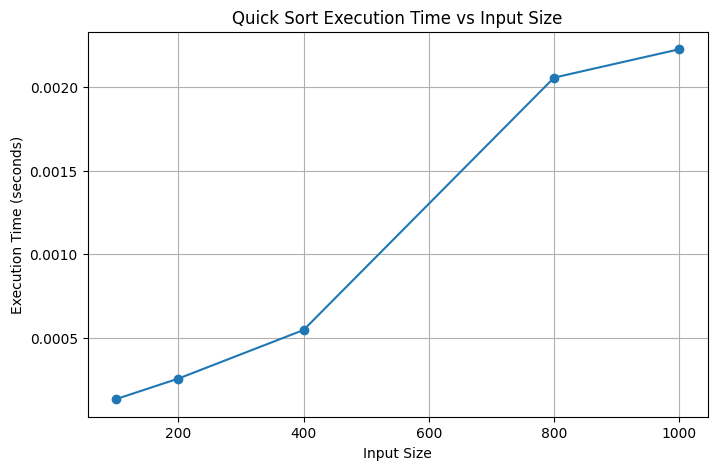

In [25]:
input_sizes = [100, 200, 400, 800, 1000]
times = []

for size in input_sizes:
    arr = random.sample(range(size * 10), size)
    start = time.time()
    quick_sort(arr)
    end = time.time()
    times.append(end - start)

plt.figure(figsize=(8,5))
plt.plot(input_sizes, times, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Quick Sort Execution Time vs Input Size')
plt.grid(True)
plt.show()


## Insertion Sort Algorithm

- **Description:** Builds the sorted list one element at a time by inserting elements into their correct position.
- **Input:** List or array of elements.
- **Output:** Sorted list.
- **Time Complexity:** Best case: \(O(n)\) (already sorted); average and worst case: \(O(n^2)\).
- **Space Complexity:** \(O(1)\) in-place sorting.
- **Suitability and Trade-offs:** Simple and efficient for small or nearly sorted datasets; inefficient on large, randomly ordered lists.


In [13]:
# Insertion Sort
def insertion_sort(arr):
    a = arr.copy()
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a

Example

In [20]:
arr = [64, 25, 12, 22, 11]
print("Original array:", arr)
print("Insertion Sort:", insertion_sort(arr))


Original array: [64, 25, 12, 22, 11]
Insertion Sort: [11, 12, 22, 25, 64]


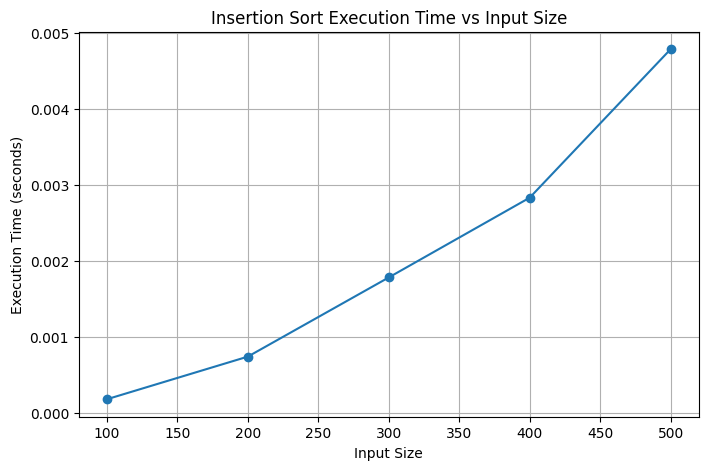

In [26]:
input_sizes = [100, 200, 300, 400, 500]  # Smaller sizes due to O(n^2)
times = []

for size in input_sizes:
    arr = random.sample(range(size * 10), size)
    start = time.time()
    insertion_sort(arr)
    end = time.time()
    times.append(end - start)

plt.figure(figsize=(8,5))
plt.plot(input_sizes, times, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Insertion Sort Execution Time vs Input Size')
plt.grid(True)
plt.show()


## Bubble Sort Algorithm

- **Description:** Repeatedly swaps adjacent elements if they are in the wrong order, passing through the list multiple times.
- **Input:** List or array of elements.
- **Output:** Sorted list.
- **Time Complexity:** Best case: \(O(n)\) (already sorted); average and worst case: \(O(n^2)\).
- **Space Complexity:** \(O(1)\) in-place sorting.
- **Suitability and Trade-offs:** Simple but generally inefficient. Mostly educational use.


In [14]:
# Bubble Sort
def bubble_sort(arr):
    a = arr.copy()
    n = len(a)
    for i in range(n):
        for j in range(0, n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
    return a

Example

In [21]:
arr = [64, 25, 12, 22, 11]
print("Original array:", arr)
print("Bubble Sort:", bubble_sort(arr))


Original array: [64, 25, 12, 22, 11]
Bubble Sort: [11, 12, 22, 25, 64]


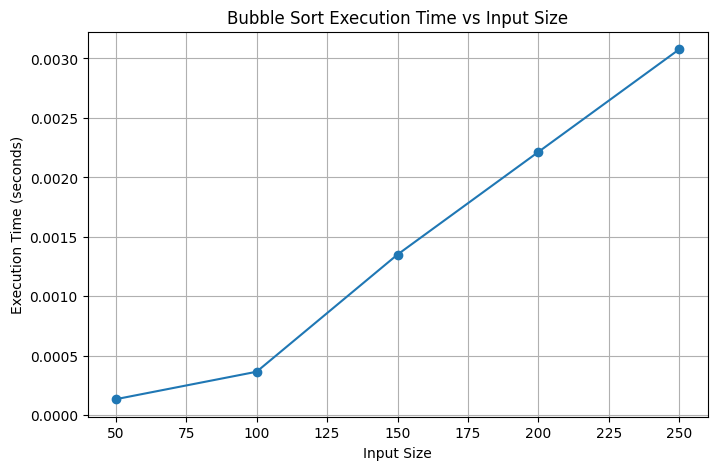

In [27]:
input_sizes = [50, 100, 150, 200, 250]  # Smaller sizes due to slower algorithm
times = []

for size in input_sizes:
    arr = random.sample(range(size * 10), size)
    start = time.time()
    bubble_sort(arr)
    end = time.time()
    times.append(end - start)

plt.figure(figsize=(8,5))
plt.plot(input_sizes, times, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Bubble Sort Execution Time vs Input Size')
plt.grid(True)
plt.show()


## Selection Sort Algorithm

- **Description:** Repeatedly selects the minimum element from the unsorted list and swaps it with the beginning element.
- **Input:** List or array of elements.
- **Output:** Sorted list.
- **Time Complexity:** Best, average, and worst case: \(O(n^2)\).
- **Space Complexity:** \(O(1)\) in-place sorting.
- **Suitability and Trade-offs:** Easy to understand but inefficient for large lists.


In [15]:
# Selection Sort
def selection_sort(arr):
    a = arr.copy()
    for i in range(len(a)):
        min_idx = i
        for j in range(i+1, len(a)):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
    return a

Example

In [22]:
arr = [64, 25, 12, 22, 11]
print("Original array:", arr)
print("Selection Sort:", selection_sort(arr))


Original array: [64, 25, 12, 22, 11]
Selection Sort: [11, 12, 22, 25, 64]


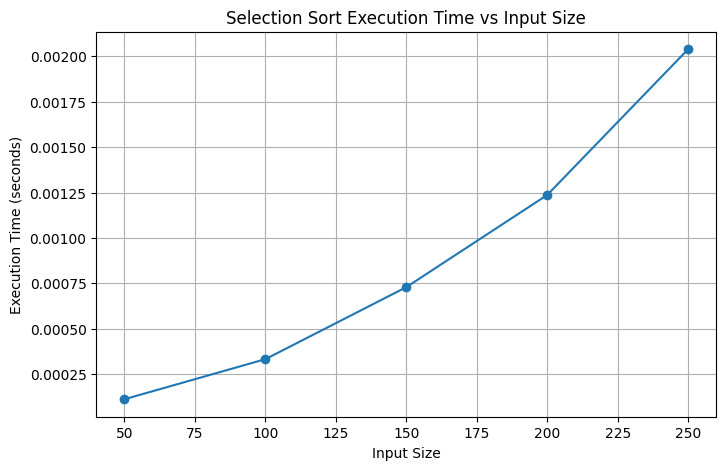

In [28]:
input_sizes = [50, 100, 150, 200, 250]  # Smaller sizes due to O(n^2) behavior
times = []

for size in input_sizes:
    arr = random.sample(range(size * 10), size)
    start = time.time()
    selection_sort(arr)
    end = time.time()
    times.append(end - start)

plt.figure(figsize=(8,5))
plt.plot(input_sizes, times, marker='o')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Selection Sort Execution Time vs Input Size')
plt.grid(True)
plt.show()


In [6]:
import random

def profile_sort_function(func, arr):
    mem_usage = memory_usage((func, (arr,)))
    start_time = time.time()
    sorted_arr = func(arr)
    end_time = time.time()
    exec_time = end_time - start_time
    return sorted_arr, exec_time, max(mem_usage)

# Generate a random input array of size 1000 for testing
input_array = random.sample(range(10000), 1000)

# Dictionary to store performance results
performance = {}

# Test each sorting algorithm
sorting_algorithms = {
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort,
    'Insertion Sort': insertion_sort,
    'Bubble Sort': bubble_sort,
    'Selection Sort': selection_sort
}

for name, func in sorting_algorithms.items():
    sorted_arr, exec_time, mem_used = profile_sort_function(func, input_array)
    performance[name] = (exec_time, mem_used)
    print(f"{name}: Time={exec_time:.6f}s, Memory={mem_used:.3f} MiB")


Merge Sort: Time=0.003446s, Memory=113.020 MiB
Quick Sort: Time=0.002833s, Memory=113.020 MiB
Insertion Sort: Time=0.172099s, Memory=113.020 MiB
Bubble Sort: Time=0.089977s, Memory=113.020 MiB
Selection Sort: Time=0.042714s, Memory=113.020 MiB


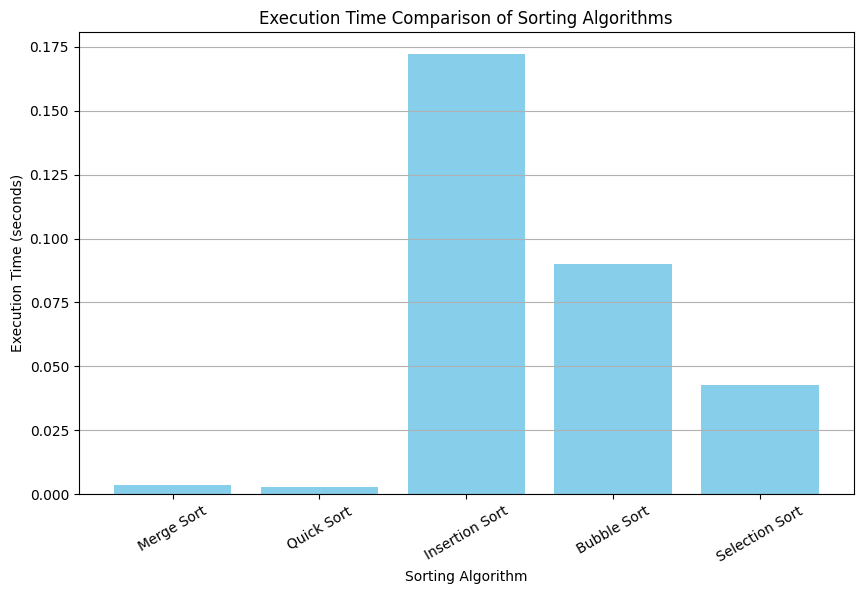

In [7]:
# Extract names and times from performance dictionary
algorithm_names = list(performance.keys())
execution_times = [performance[name][0] for name in algorithm_names]

# Plotting execution times
plt.figure(figsize=(10,6))
plt.bar(algorithm_names, execution_times, color='skyblue')
plt.xlabel('Sorting Algorithm')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison of Sorting Algorithms')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.show()


## Binary Search Algorithm

- **Description:** Efficiently finds the position of a target value within a sorted list by repeatedly dividing the search interval in half.
- **Input:** Sorted list or array, target value.
- **Output:** Index of the target if found; -1 if not found.
- **Time Complexity:** Best case: \(O(1)\); average and worst case: \(O(\log n)\).
- **Space Complexity:** \(O(1)\) iterative implementation.
- **Suitability and Trade-offs:** Very fast search on sorted data. Requires pre-sorted input.


In [8]:
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1


Example

In [23]:
sorted_arr = [11, 12, 22, 25, 64]
target = 22
index = binary_search(sorted_arr, target)
print(f"Binary Search: Target {target} found at index {index}")


Binary Search: Target 22 found at index 2


In [9]:
# Generate a sorted array for testing binary search
sorted_array = sorted(random.sample(range(10000), 1000))
target = sorted_array[500]

def profile_binary_search(func, arr, tgt):
    mem_usage = memory_usage((func, (arr, tgt)))
    start_time = time.time()
    index = func(arr, tgt)
    end_time = time.time()
    exec_time = end_time - start_time
    return index, exec_time, max(mem_usage)

index_found, time_taken, memory_used = profile_binary_search(binary_search, sorted_array, target)
print(f"Binary Search: Target={target}, Index Found={index_found}, Time={time_taken:.6f}s, Memory={memory_used:.3f} MiB")


Binary Search: Target=5073, Index Found=500, Time=0.000010s, Memory=114.754 MiB


| Algorithm           | Time Complexity (Best / Avg / Worst) | Space Complexity | Observed Execution Time       | Suitability & Trade-offs                         |
|---------------------|-------------------------------------|------------------|------------------------------|-------------------------------------------------|
| Fibonacci (Naive)   | O(2^n) / O(2^n) / O(2^n)            | O(n) (call stack) | Exponentially slow for n>20   | Simple but inefficient, deep recursion risk      |
| Fibonacci (DP)      | O(n) / O(n) / O(n)                   | O(n)              | Very fast, linear             | Efficient, uses memoization                       |
| Merge Sort          | O(n log n) / O(n log n) / O(n log n)| O(n)              | Consistent fast sorting       | Stable, good for large data                       |
| Quick Sort          | O(n log n) / O(n log n) / O(n^2)    | O(log n)          | Fast average, worst slow      | Fast but worst-case risk, pivot choice dependent |
| Insertion Sort      | O(n) / O(n^2) / O(n^2)               | O(1)              | Slow for large arrays         | Simple, good for small or nearly sorted data     |
| Bubble Sort         | O(n) / O(n^2) / O(n^2)               | O(1)              | Slowest                       | Educational, rarely used in practice              |
| Selection Sort      | O(n^2) / O(n^2) / O(n^2)             | O(1)              | Slow                         | Simple but inefficient                            |
| Binary Search       | O(1) / O(log n) / O(log n)           | O(1)              | Very fast                    | Requires sorted array, efficient search          |


### Reflections

- The naive recursive Fibonacci algorithm exhibits deep recursive calls that can lead to stack overflow for large inputs. Its exponential time complexity makes it impractical beyond small n.
- Dynamic programming overcomes this by storing intermediate results, reducing recursion depth and achieving linear time complexity.
- Quick sort is generally fast with average O(n log n) time but may degrade to O(n²) depending on pivot selection.
- Binary search requires sorted input but allows efficient O(log n) searching compared to linear scans.


## Combined Performance Comparison of Algorithms

Here we present a comparison of execution times for all implemented algorithms across varying input sizes.

- **Fibonacci Algorithms:**  
  The naive recursive implementation exhibits exponential time growth and is impractical beyond n=20. The dynamic programming version is significantly faster, showing linear growth.

- **Sorting Algorithms:**  
  Merge sort and quick sort efficiently handle large inputs with \(O(n \log n)\) complexity, while insertion, bubble, and selection sorts have higher execution times due to quadratic complexity.

- **Binary Search:**  
  Shows very fast \(O(\log n)\) performance on sorted data, demonstrating its efficiency even on large inputs.

These comparison graphs visualize the practical implications of algorithmic time complexities and help in understanding their suitability based on input size and context.


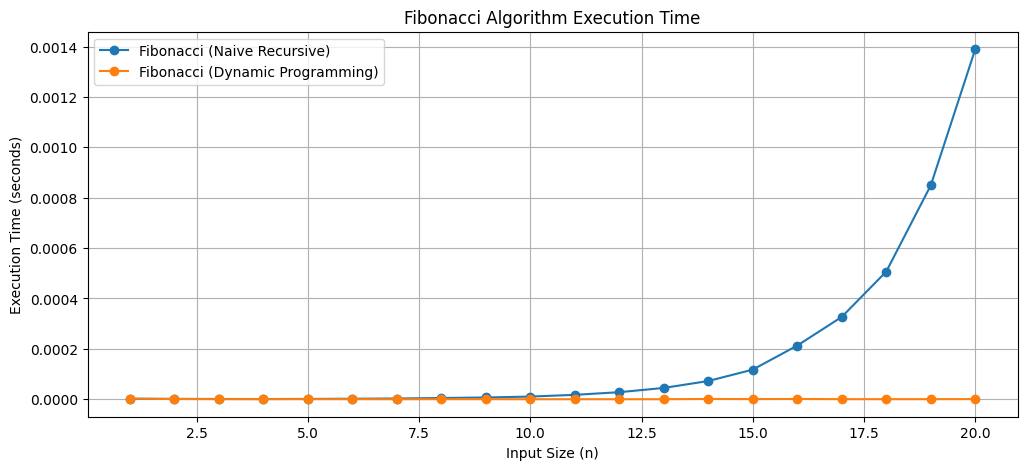

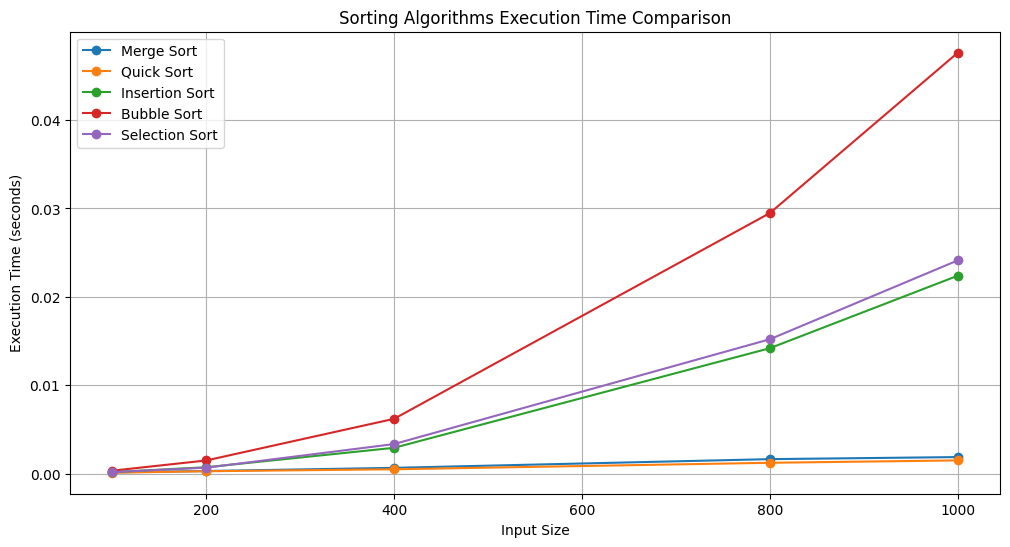

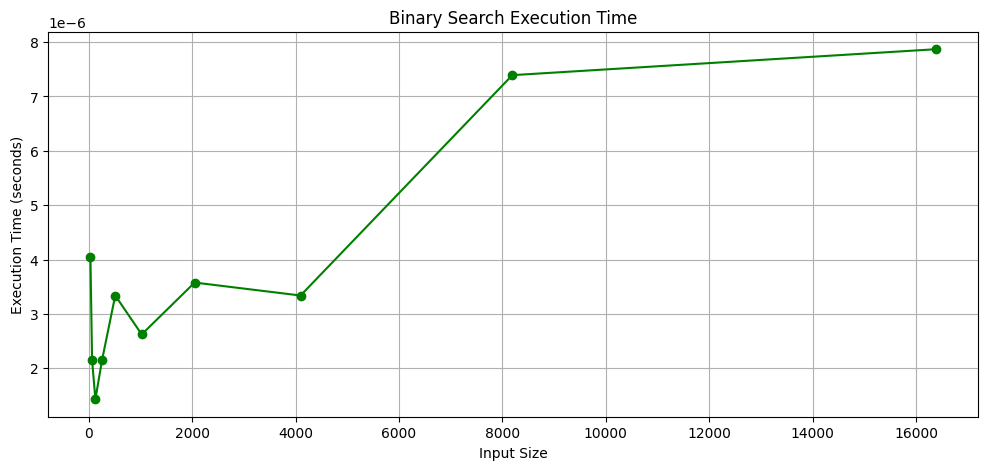

In [29]:
import random
import time
import matplotlib.pyplot as plt

# Define all algorithms with display names and functions
all_algorithms = {
    'Fibonacci (Naive Recursive)': fibonacci_recursive,
    'Fibonacci (Dynamic Programming)': fibonacci_dp,
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort,
    'Insertion Sort': insertion_sort,
    'Bubble Sort': bubble_sort,
    'Selection Sort': selection_sort,
    'Binary Search': binary_search
}

# Prepare input sizes and data for each algorithm type

# Fibonacci input sizes (small for naive recursion)
fib_input_sizes = list(range(1, 21))
fib_naive_times = []
fib_dp_times = []

for n in fib_input_sizes:
    start = time.time()
    fibonacci_recursive(n)
    end = time.time()
    fib_naive_times.append(end - start)

    start = time.time()
    fibonacci_dp(n)
    end = time.time()
    fib_dp_times.append(end - start)

# Sorting input sizes
sort_input_sizes = [100, 200, 400, 800, 1000]
sort_times = {name: [] for name in ['Merge Sort', 'Quick Sort', 'Insertion Sort', 'Bubble Sort', 'Selection Sort']}

for size in sort_input_sizes:
    arr = random.sample(range(size * 10), size)
    for name in sort_times.keys():
        func = all_algorithms[name]
        test_arr = arr.copy()
        start = time.time()
        func(test_arr)
        end = time.time()
        sort_times[name].append(end - start)

# Binary Search input sizes (powers of 2)
bs_input_sizes = [2**i for i in range(5, 15)]
bs_times = []

for size in bs_input_sizes:
    arr = sorted(random.sample(range(size * 10), size))
    target = arr[size // 2]
    start = time.time()
    binary_search(arr, target)
    end = time.time()
    bs_times.append(end - start)

# Plotting Fibonacci Times
plt.figure(figsize=(12, 5))
plt.plot(fib_input_sizes, fib_naive_times, label='Fibonacci (Naive Recursive)', marker='o')
plt.plot(fib_input_sizes, fib_dp_times, label='Fibonacci (Dynamic Programming)', marker='o')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.title('Fibonacci Algorithm Execution Time')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Sorting Algorithms Times
plt.figure(figsize=(12, 6))
for name, times in sort_times.items():
    plt.plot(sort_input_sizes, times, marker='o', label=name)

plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Sorting Algorithms Execution Time Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Binary Search Times
plt.figure(figsize=(12, 5))
plt.plot(bs_input_sizes, bs_times, marker='o', color='green')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Binary Search Execution Time')
plt.grid(True)
plt.show()


## Comparison of Merge Sort and Quick Sort

This graph compares the execution times of Merge Sort and Quick Sort across increasing input sizes.

Both algorithms have average time complexity \(O(n \log n)\), but differences in pivot selection and merging strategy can affect their real-world performance. This comparison highlights these performance nuances.


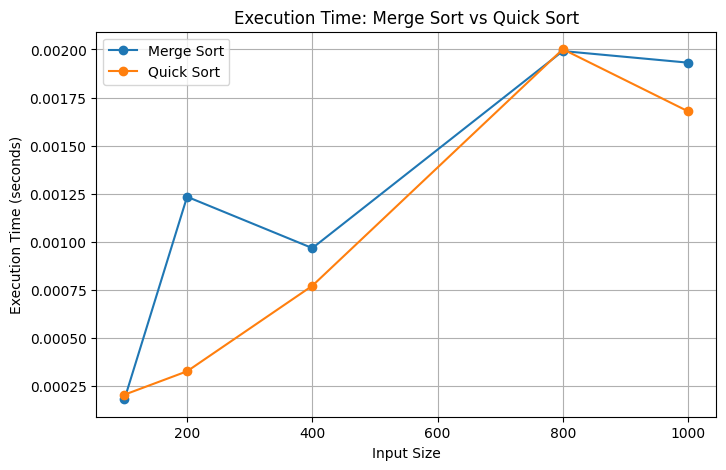

In [30]:
import random
import time
import matplotlib.pyplot as plt

input_sizes = [100, 200, 400, 800, 1000]

def get_times(sorting_func):
    times = []
    for size in input_sizes:
        arr = random.sample(range(size * 10), size)
        start = time.time()
        sorting_func(arr)
        end = time.time()
        times.append(end - start)
    return times

# Pair 1: Merge Sort vs Quick Sort
times_merge = get_times(merge_sort)
times_quick = get_times(quick_sort)

plt.figure(figsize=(8,5))
plt.plot(input_sizes, times_merge, marker='o', label='Merge Sort')
plt.plot(input_sizes, times_quick, marker='o', label='Quick Sort')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time: Merge Sort vs Quick Sort')
plt.legend()
plt.grid(True)
plt.show()


## Comparison of Insertion Sort and Bubble Sort

This graph compares Insertion Sort and Bubble Sort, both of which have average and worst-case time complexity of \(O(n^2)\).

The visualization helps illustrate which algorithm performs better on larger inputs and shows the practical cost of quadratic algorithms.


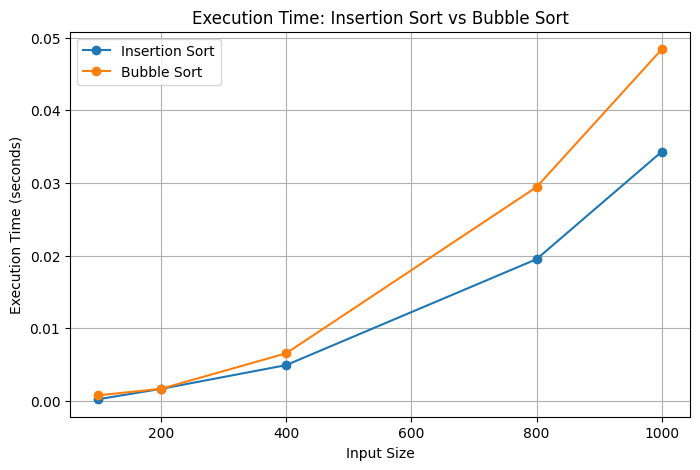

In [31]:
times_insertion = get_times(insertion_sort)
times_bubble = get_times(bubble_sort)

plt.figure(figsize=(8,5))
plt.plot(input_sizes, times_insertion, marker='o', label='Insertion Sort')
plt.plot(input_sizes, times_bubble, marker='o', label='Bubble Sort')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time: Insertion Sort vs Bubble Sort')
plt.legend()
plt.grid(True)
plt.show()


## Comparison of Selection Sort and Insertion Sort

This graph compares Selection Sort and Insertion Sort, both simple quadratic time algorithms useful for small datasets.

Users can observe performance differences due to algorithmic strategies despite the same complexity class.


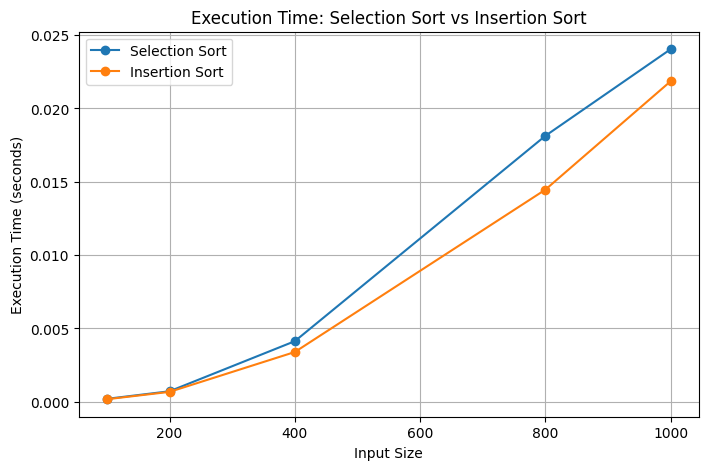

In [32]:
times_selection = get_times(selection_sort)
times_insertion = get_times(insertion_sort)

plt.figure(figsize=(8,5))
plt.plot(input_sizes, times_selection, marker='o', label='Selection Sort')
plt.plot(input_sizes, times_insertion, marker='o', label='Insertion Sort')
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time: Selection Sort vs Insertion Sort')
plt.legend()
plt.grid(True)
plt.show()


## Final Summary and Reflections

This project provided hands-on experience with implementing classical algorithms and analyzing their efficiency.

Key learnings include:

- The exponential time complexity of naive recursive Fibonacci makes it impractical for large inputs, while dynamic programming dramatically optimizes performance with memoization.
- Sorting algorithms display varied performance due to differences in algorithmic complexity and approach; merge sort and quick sort are generally efficient, whereas simpler sorts like bubble, insertion, and selection exhibit quadratic time complexity, limiting their scalability.
- Binary search offers efficient \(O(\log n)\) search on sorted data, highlighting the importance of data structure preparation for efficient algorithms.
- Profiling and visualization reinforce theoretical concepts, providing concrete insights into algorithm behavior.
- Challenges included managing recursion depth limitations and balancing time-space trade-offs in algorithm selection.

Overall, the project strengthened understanding of algorithm design, analysis, and practical evaluation techniques.

